In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys

In [2]:
n_clusters = 4
x, y = make_blobs(n_samples=400, centers=n_clusters)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [3]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

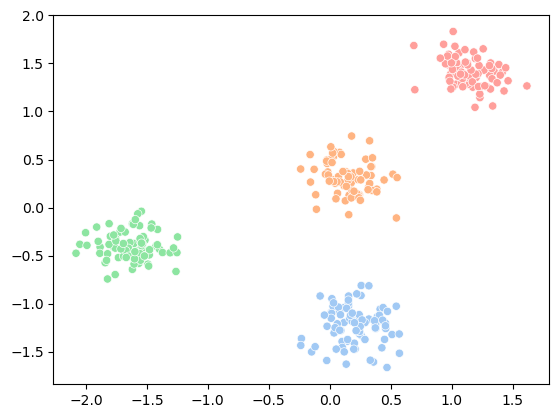

In [4]:
sns.scatterplot(x=[x[0] for x in x_train], y=[x[1] for x in x_train], hue=y_train, palette="pastel", legend=None)
plt.show()

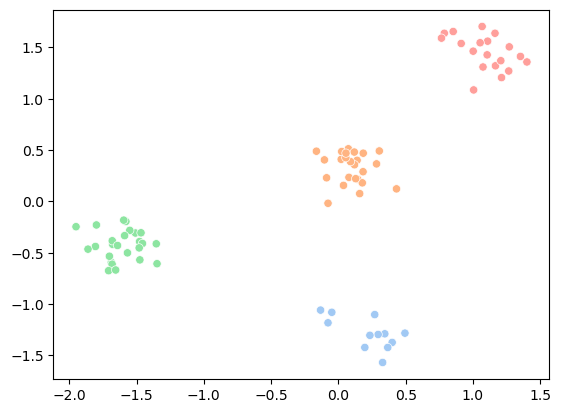

In [5]:
sns.scatterplot(x=[x[0] for x in x_test], y=[x[1] for x in x_test], hue=y_test, palette="pastel", legend=None)
plt.show()

In [6]:
def euclidean(point,data):
    return np.sqrt(np.sum((point-data)**2, axis=1))

In [7]:
class KMeans:
    def __init__(self, n_clusters=3, max_iter=1000, e=1e-4):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.e=e
    
    def fit(self, x_train):

        first_centroids_idx = np.random.choice(len(x_train), self.n_clusters)
        self.centroids = [x_train[i] for i in first_centroids_idx]
        
        iteration=0
        prev_centroids=None
        error=sys.float_info.max
        
        while error > self.e and iteration < self.max_iter:
            
            clusters = [[] for _ in range(self.n_clusters)]
            
            for x in x_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                clusters[centroid_idx].append(x)
                
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in clusters]
            
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
                    
            error = [prev_centroids[i] - self.centroids[i] for i in range(len(prev_centroids))]
            error = np.max(error)
                    
            iteration += 1
            
            
    def evaluate(self, x_to_cluster):
        points = []
        clusters_idxs = []

        for x in x_to_cluster:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            points.append(self.centroids[centroid_idx])
            clusters_idxs.append(centroid_idx)

        return points, clusters_idxs
            
            


In [8]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x_train)

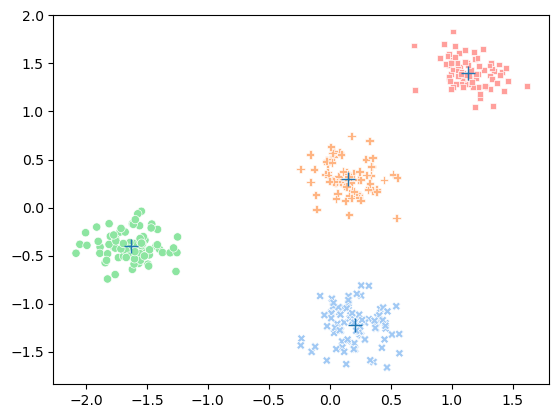

In [9]:
points, clusters = kmeans.evaluate(x_train)
sns.scatterplot(x=[x[0] for x in x_train], y=[x[1] for x in x_train], hue=y_train, style=clusters, palette="pastel", legend=None)
plt.plot([x for x, _ in kmeans.centroids], [y for _, y in kmeans.centroids], '+', markersize=10)
plt.show()

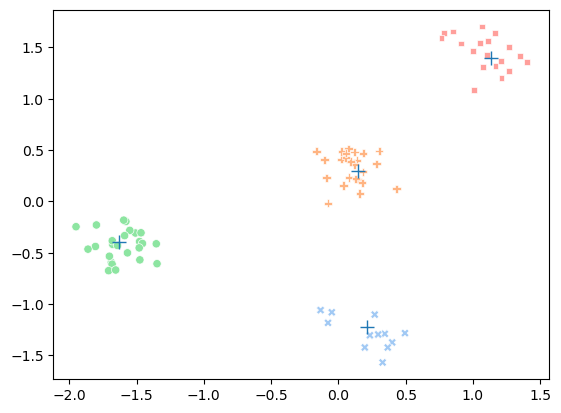

In [10]:
points, clusters = kmeans.evaluate(x_test)
sns.scatterplot(x=[x[0] for x in x_test], y=[x[1] for x in x_test], hue=y_test, style=clusters, palette="pastel", legend=None)
plt.plot([x for x, _ in kmeans.centroids], [y for _, y in kmeans.centroids], '+', markersize=10)
plt.show()